In [1]:
import matplotlib.pyplot as plt
import fastf1.plotting
import fastf1

fastf1.plotting.setup_mpl(misc_mpl_mods = False)

session = fastf1.get_session(2021, 'Spanish Grand Prix', 'Q')
session.load()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\abdul\AppData\Local\Temp\fastf1.
	Size: 458.07 MB
core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.1.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '16', '31', '55', '3', '11', '4', '14', '18', '10', '5', '99', '63', '22', '7', '47'

In [20]:
session.results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
44,44,L HAMILTON,HAM,hamilton,Mercedes,00D2BE,mercedes,Lewis,Hamilton,Lewis Hamilton,...,,1.0,,NaN,0 days 00:01:18.245000,0 days 00:01:17.166000,0 days 00:01:16.741000,NaT,,NaN
33,33,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,0600EF,red_bull,Max,Verstappen,Max Verstappen,...,,2.0,,NaN,0 days 00:01:18.090000,0 days 00:01:16.922000,0 days 00:01:16.777000,NaT,,NaN
77,77,V BOTTAS,BOT,bottas,Mercedes,00D2BE,mercedes,Valtteri,Bottas,Valtteri Bottas,...,,3.0,,NaN,0 days 00:01:18.005000,0 days 00:01:17.142000,0 days 00:01:16.873000,NaT,,NaN
16,16,C LECLERC,LEC,leclerc,Ferrari,DC0004,ferrari,Charles,Leclerc,Charles Leclerc,...,,4.0,,NaN,0 days 00:01:18.041000,0 days 00:01:17.717000,0 days 00:01:17.510000,NaT,,NaN
31,31,E OCON,OCO,ocon,Alpine,0090FF,alpine,Esteban,Ocon,Esteban Ocon,...,,5.0,,NaN,0 days 00:01:18.281000,0 days 00:01:17.743000,0 days 00:01:17.580000,NaT,,NaN
55,55,C SAINZ,SAI,sainz,Ferrari,DC0004,ferrari,Carlos,Sainz,Carlos Sainz,...,,6.0,,NaN,0 days 00:01:18.205000,0 days 00:01:17.656000,0 days 00:01:17.620000,NaT,,NaN
3,3,D RICCIARDO,RIC,ricciardo,McLaren,FF9800,mclaren,Daniel,Ricciardo,Daniel Ricciardo,...,,7.0,,NaN,0 days 00:01:18.264000,0 days 00:01:17.719000,0 days 00:01:17.622000,NaT,,NaN
11,11,S PEREZ,PER,perez,Red Bull Racing,0600EF,red_bull,Sergio,Perez,Sergio Perez,...,,8.0,,NaN,0 days 00:01:18.203000,0 days 00:01:17.669000,0 days 00:01:17.701000,NaT,,NaN
4,4,L NORRIS,NOR,norris,McLaren,FF9800,mclaren,Lando,Norris,Lando Norris,...,,9.0,,NaN,0 days 00:01:17.821000,0 days 00:01:17.696000,0 days 00:01:18.010000,NaT,,NaN
14,14,F ALONSO,ALO,alonso,Alpine,0090FF,alpine,Fernando,Alonso,Fernando Alonso,...,,10.0,,NaN,0 days 00:01:18.281000,0 days 00:01:17.966000,0 days 00:01:18.147000,NaT,,NaN


In [15]:
ver_lap = session.laps.pick_driver('VER').pick_fastest()
ham_lap = session.laps.pick_driver('HAM').pick_fastest()
lec_lap = session.laps.pick_driver('LEC').pick_fastest()

In [16]:
ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()
lec_tel = lec_lap.get_car_data().add_distance()

In [17]:
rbr_color = fastf1.plotting.team_color('RBR')
mer_color = fastf1.plotting.team_color('MER')
fer_color = fastf1.plotting.team_color('FER')

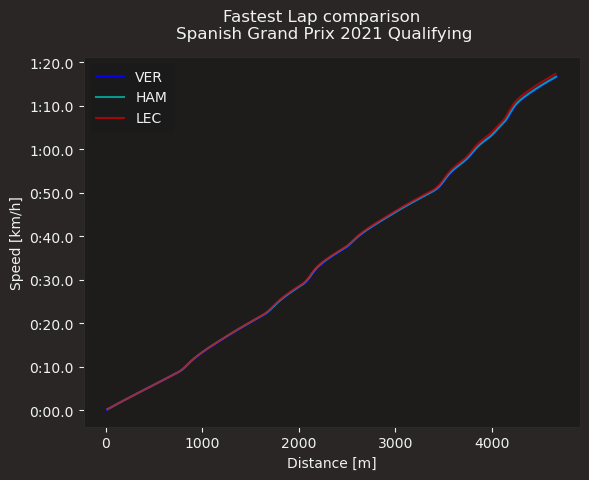

In [18]:
fig, ax = plt.subplots()
ax.plot(ver_tel['Distance'], ver_tel['Time'], color=rbr_color, label='VER')
ax.plot(ham_tel['Distance'], ham_tel['Time'], color=mer_color, label='HAM', alpha=0.7)
ax.plot(lec_tel['Distance'], lec_tel['Time'], color=fer_color, label='LEC', alpha=0.7)

ax.set_xlabel('Distance [m]')
ax.set_ylabel('Speed [km/h]')
ax.legend()
plt.suptitle(f'Fastest Lap comparison \n'
             f"{session.event.EventName} {session.event.year} Qualifying")
plt.show()